In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
digits=load_digits()

In [2]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

<Figure size 640x480 with 0 Axes>

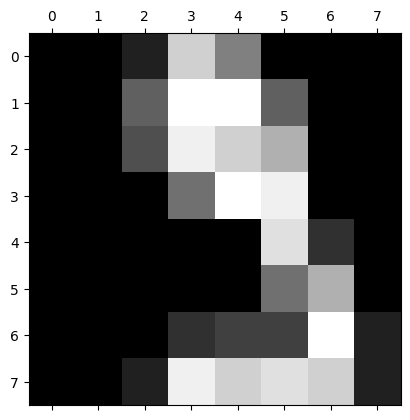

In [3]:
plt.gray()
plt.matshow(digits.images[31])
plt.show()

In [4]:
data=digits.data # x
features=digits.feature_names # features
target=digits.target # y

In [5]:
df=pd.DataFrame(data,columns=features)

In [6]:
df=df.join(pd.DataFrame(target))

In [7]:
df.rename(columns={0:'target'},inplace=True)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [8]:
x=df.drop(columns='target')
y=df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=99)

In [11]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(30)

In [36]:
forest.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=30)

In [31]:
forest.score(xtest,ytest)

0.975

In [32]:
from sklearn.metrics import confusion_matrix

In [37]:
cm=confusion_matrix(ytest,forest.predict(xtest))
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 29,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 41,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 27,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 34,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  0,  0,  1,  0,  0, 28,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 29]], dtype=int64)

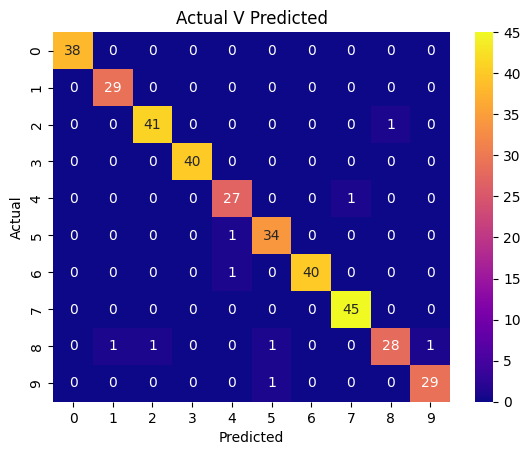

In [38]:
import seaborn as sn
sn.heatmap(cm,annot=True,cmap='plasma')
plt.title('Actual V Predicted')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()